# Solving Boundary Value Problems using Shooting Method </br>

 ## Problem 1 </br>
   #### Equation :  y * (d<sup>2</sup>y/dx<sup>2</sup>) + 1 + (dy/dx)<sup>2</sup> = 0 </br></br>

   #### Boundary Conditions - </br>
      y(0) = 1, y(1) = 2 
      Choose alpha_0 = 0.5, alpha_0 = 1.0 
      h = 0.2 
 ## Problem 2 </br>
   #### Equation :  d<sup>2</sup>y/dx<sup>2</sup> - y = 0 </br> </br>

   #### Boundary Conditions - </br>
      y(0) = 0, y(1) = -1    
      Choose alpha_0 = 0.3, alpha_0 = 0.4 
      h = 0.1 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#### Function to return value of dp/dx while solving coupled IVP

In [4]:
def f1(x, p ,q):
    return q

#### Function to return value of dq/dx while solving coupled IVP
Both the problems are inlcluded in the same function. Hence comment/uncomment accordingly

In [5]:
def f2(x, p, q):
    return p       # This is for problem 2  
    
    # The following is for problem 1

    #if x == 0:
     #   return 0
    #else:
#        return (1 + q**2)/(1.0 * p)


#### Function to solve the coupled set of IVPs and return values at each of the grid points

In [6]:
def runge_kutta_4(x, p, q, h):
    u = np.vstack((p,q))
    
    for i in range(len(p)-1):
        k1 = np.array((f1(x[i], p[i], q[i]), f2(x[i], p[i], q[i])))
        k2 = np.array((f1(x[i] + 0.5*h, p[i] + k1[0]*h*0.5, q[i] + k1[1]*h*0.5 ), f2(x[i] + 0.5*h, p[i] + k1[0]*h*0.5, q[i] + k1[1]*h*0.5 )))
        k3 = np.array((f1(x[i] + 0.5*h, p[i] + k2[0]*h*0.5, q[i] + k2[1]*h*0.5 ), f2(x[i] + 0.5*h, p[i] + k2[0]*h*0.5, q[i] + k2[1]*h*0.5 )))
        k4 = np.array((f1(x[i] + h, p[i] + k3[0]*h, q[i] + k3[1]*h ), f2(x[i] + h, p[i] + k3[0]*h, q[i] + k3[1]*h )))
        u[:,i+1] = u[:,i] + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4)
        p = u[0]
        q = u[1]
    return p,q

#### Function that uses shooting method to solve the BVP

In [7]:
def bvp(ya, yb, a0, a1, start, end, h, conv_threshold):
    x = np.linspace(start, end, int((end - start)/(1.0 * h) +1) )
    p = x.copy()
    q = x.copy()
    p[0] = ya   
    
    while abs(a0 - a1) > conv_threshold:
        q[0] = a0
        p, q = runge_kutta_4(x, p, q, h)
        print p
        print q
        y0 = p[-1]
        q[0] = a1
        p, q = runge_kutta_4(x, p , q, h)
        print p
        print q
        print "Iteration over"
        y1 = p[-1]
        
        a2 = a0 - (a1 - a0)*(y0 - yb)/(1.0*(y1 - y0))
        a0 = a1
        a1 = a2
    print "Alpha has converged to %s" % (a0)
    print '\nx is \t %s' % x
    print 'y is \t %s' % p
    print 'dy/dx is %s' % q
    plt.ylabel('y')
    plt.xlabel('x')
    plt.plot(x, p)
    

#### The main function calls the BVP function with the required input
Both the problems are inlcluded in the same function. Hence comment/uncomment accordingly

[ 0.          0.0604      0.12322405  0.19099344  0.26642793  0.35255488]
[ 0.3         0.30602     0.32432133  0.35563849  0.40122832  0.46292046]
[ 0.          0.08053333  0.16429874  0.25465793  0.35523724  0.47007318]
[ 0.4         0.40802667  0.43242845  0.47418466  0.53497109  0.61722727]
Iteration over
[ 0.          0.08053333  0.16429874  0.25465793  0.35523724  0.47007318]
[ 0.4         0.40802667  0.43242845  0.47418466  0.53497109  0.61722727]
[ 0.         -0.17132084 -0.34951736 -0.54174103 -0.75570625 -1.        ]
[-0.85093134 -0.86800669 -0.91991729 -1.00874646 -1.13805917 -1.31304508]
Iteration over
Alpha has converged to -0.850931338517

x is 	 [ 0.   0.2  0.4  0.6  0.8  1. ]
y is 	 [ 0.         -0.17132084 -0.34951736 -0.54174103 -0.75570625 -1.        ]
dy/dx is [-0.85093134 -0.86800669 -0.91991729 -1.00874646 -1.13805917 -1.31304508]


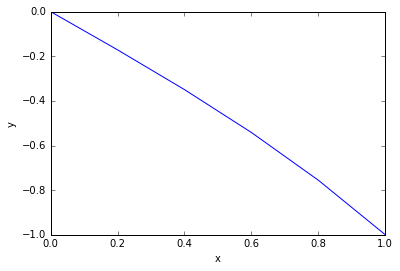

In [8]:
def main():
    #bvp(1, 2, 0.5, 1.0, 0, 1, 0.2, 0.00001)              # For problem 1    
    bvp(0, -1, 0.3, 0.4, 0, 1, 0.2, 0.0001)              # For problem 2

main()    